In [1]:
import numpy as np
import torch

class TrainTestDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.n_channel = data.shape[1]
        self.data = data
        
    def __getitem__(self, index):

        x = self.data[index, :, :, :].astype(np.float32)
        x /= np.array([np.max(x[i,:,:]) for i in range(self.n_channel)])[:,None,None]
        x = torch.FloatTensor(x)

        return x
        
    def __len__(self):
        return len(self.data)

In [33]:
a = np.random.random((3, 6, 10, 10)) * 0.6 + 0.2
a[0]

array([[[0.73806224, 0.43610315, 0.22138284, 0.7332439 , 0.75343889,
         0.64992715, 0.69958784, 0.65823964, 0.29711774, 0.46521985],
        [0.29997919, 0.34992786, 0.75155714, 0.24518411, 0.71840064,
         0.24486664, 0.79958615, 0.59727596, 0.47385418, 0.58402062],
        [0.43115861, 0.20374965, 0.29621051, 0.23445912, 0.31737107,
         0.34808591, 0.78735471, 0.44202251, 0.73304739, 0.28595984],
        [0.26463789, 0.35692424, 0.76726412, 0.20677013, 0.60861196,
         0.76151651, 0.72546519, 0.38354911, 0.66388156, 0.75194397],
        [0.38019576, 0.76929419, 0.55948031, 0.55430907, 0.70264315,
         0.7241674 , 0.22936021, 0.46854814, 0.36221843, 0.63285932],
        [0.68406207, 0.2258144 , 0.45700559, 0.49411079, 0.77305726,
         0.2287526 , 0.78202479, 0.49654166, 0.49881593, 0.45949524],
        [0.43598475, 0.6728106 , 0.67339206, 0.62497079, 0.28434595,
         0.79821108, 0.63231352, 0.72638951, 0.20074837, 0.65078179],
        [0.27603532, 0.2160

In [34]:

data_trt_sample = TrainTestDataset(a)

In [35]:
data_trt_sample.data[0]

array([[[0.73806224, 0.43610315, 0.22138284, 0.7332439 , 0.75343889,
         0.64992715, 0.69958784, 0.65823964, 0.29711774, 0.46521985],
        [0.29997919, 0.34992786, 0.75155714, 0.24518411, 0.71840064,
         0.24486664, 0.79958615, 0.59727596, 0.47385418, 0.58402062],
        [0.43115861, 0.20374965, 0.29621051, 0.23445912, 0.31737107,
         0.34808591, 0.78735471, 0.44202251, 0.73304739, 0.28595984],
        [0.26463789, 0.35692424, 0.76726412, 0.20677013, 0.60861196,
         0.76151651, 0.72546519, 0.38354911, 0.66388156, 0.75194397],
        [0.38019576, 0.76929419, 0.55948031, 0.55430907, 0.70264315,
         0.7241674 , 0.22936021, 0.46854814, 0.36221843, 0.63285932],
        [0.68406207, 0.2258144 , 0.45700559, 0.49411079, 0.77305726,
         0.2287526 , 0.78202479, 0.49654166, 0.49881593, 0.45949524],
        [0.43598475, 0.6728106 , 0.67339206, 0.62497079, 0.28434595,
         0.79821108, 0.63231352, 0.72638951, 0.20074837, 0.65078179],
        [0.27603532, 0.2160

In [44]:
dataLoader = torch.utils.data.DataLoader(
			data_trt_sample,
			batch_size = 1, 
			shuffle = False)

In [45]:
real_data = None
for i, data in enumerate(dataLoader):
    print(i)
    if real_data is None:
        real_data = data
    else:
        real_data = torch.cat((real_data, data), dim = 0)

0
1
2


In [46]:
data.shape

torch.Size([1, 6, 10, 10])

In [48]:
real_data

tensor([[[[0.9231, 0.5454, 0.2769,  ..., 0.8232, 0.3716, 0.5818],
          [0.3752, 0.4376, 0.9399,  ..., 0.7470, 0.5926, 0.7304],
          [0.5392, 0.2548, 0.3705,  ..., 0.5528, 0.9168, 0.3576],
          ...,
          [0.3452, 0.2702, 0.3742,  ..., 0.7028, 0.9355, 0.6584],
          [0.9801, 0.6290, 0.6051,  ..., 0.6770, 0.4957, 0.4614],
          [0.4229, 0.9470, 0.6842,  ..., 0.4011, 0.7098, 0.4211]],

         [[0.3600, 0.6335, 0.5670,  ..., 0.3996, 0.8597, 0.3574],
          [0.4537, 0.7156, 0.7722,  ..., 0.5450, 0.6157, 0.4016],
          [0.2797, 0.8830, 0.2629,  ..., 0.6288, 0.8311, 0.3061],
          ...,
          [0.8885, 0.4651, 0.5215,  ..., 0.9860, 0.2608, 0.2651],
          [0.9046, 0.8896, 0.8720,  ..., 0.4158, 0.4661, 0.7032],
          [0.5203, 0.9018, 0.3293,  ..., 0.6946, 0.4526, 0.5324]],

         [[0.3163, 1.0000, 0.5368,  ..., 0.2891, 0.8895, 0.6784],
          [0.7693, 0.9681, 0.6800,  ..., 0.2564, 0.4026, 0.8453],
          [0.6996, 0.7061, 0.8928,  ..., 0

# Normalize the Selected Gene Counts

In [1]:
import scanpy as sc
GI_adata = sc.read('GI_raw.h5ad')

# Find the genes related to perturbations

In [3]:
import numpy as np
import pandas as pd

k562_tfs_7_cell = pd.read_csv('./GSE133344_filtered_cell_identities.csv.gz')


ListUSE = []
for i in range(k562_tfs_7_cell.shape[0]):
    listPer_i = k562_tfs_7_cell['guide_identity'][i].split('__')[0].split('_')
    ListUSE.append(listPer_i[0]); ListUSE.append(listPer_i[0]) 
perturb_list = np.unique(ListUSE)

In [4]:
perturb_listlower = [i.lower() for i in perturb_list]
gene_raw_list = [i.lower() for i in list(GI_adata.var.index)]
gene_raw_set = set(gene_raw_list) 

index_raw_no = []
index_raw_yes = []
gene_per_yes = []
for i in range(len(perturb_listlower)):
    if perturb_listlower[i] not in gene_raw_set:
        index_raw_no.append(i)
        #gene_per_yes.append(None)
    else:
        index_raw_yes.append(i)
        gene_per_yes.append(np.where(np.array(gene_raw_list) == perturb_listlower[i])[0][0])

print(len(gene_per_yes)); print(len(perturb_listlower))

101
108


In [5]:
gene_per_yes_unique = np.unique(gene_per_yes)
sc.settings.verbosity = 3
sc.logging.print_versions()

-----
anndata     0.7.5
scanpy      1.7.1
sinfo       0.3.1
-----
PIL                 8.1.0
anndata             0.7.5
backcall            0.1.0
bottleneck          1.2.1
cffi                1.11.5
cloudpickle         0.5.3
colorama            0.3.9
cycler              0.10.0
cython_runtime      NA
cytoolz             0.9.0.1
dask                0.17.5
dateutil            2.7.3
decorator           4.3.0
get_version         2.1
google              NA
h5py                2.10.0
importlib_metadata  1.3.0
ipykernel           4.8.2
ipython_genutils    0.2.0
ipywidgets          7.2.1
jedi                0.12.0
joblib              0.14.1
kiwisolver          1.0.1
legacy_api_wrap     1.2
llvmlite            0.31.0
matplotlib          3.2.1
more_itertools      NA
mpl_toolkits        NA
natsort             6.2.0
numba               0.47.0
numexpr             2.6.5
numpy               1.19.5
packaging           17.1
pandas              0.25.3
parso               0.2.0
pexpect             4.5.0
pic

normalizing counts per cell
    finished (0:00:04)


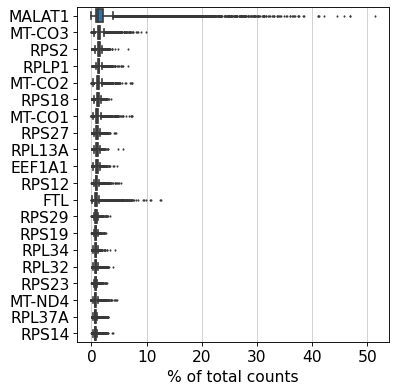

In [6]:
sc.settings.set_figure_params(dpi=80)
sc.pl.highest_expr_genes(GI_adata, n_top = 20)

In [7]:
sc.pp.filter_cells(GI_adata, min_genes = 200)
sc.pp.filter_genes(GI_adata, min_cells = 3)

filtered out 11081 genes that are detected in less than 3 cells


In [8]:
GI_adata.X.shape

(111668, 22613)

In [9]:
GI_adata.X.min(), GI_adata.X.max()

(0.0, 3718.0)

In [10]:
mito_genes = GI_adata.var_names.str.startswith('MT-')

In [13]:
GI_adata.obs['percent_mito'] = np.sum(
    GI_adata[:, mito_genes].X, axis=1).A1 / np.sum(GI_adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
GI_adata.obs['n_counts'] = GI_adata.X.sum(axis=1).A1


In [14]:
(GI_adata.obs['n_genes'] < 6000).sum(), (GI_adata.obs['percent_mito'] < 0.1).sum()

(111627, 109991)

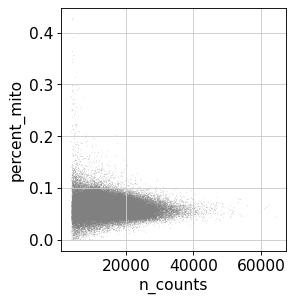

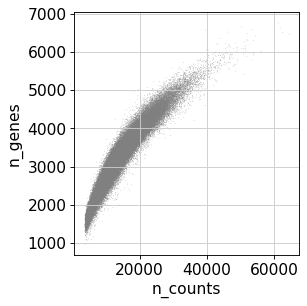

In [16]:
sc.pl.scatter(GI_adata, x='n_counts', y='percent_mito')
sc.pl.scatter(GI_adata, x='n_counts', y='n_genes')

In [17]:
GI_adata = GI_adata[GI_adata.obs['n_genes'] < 6000, :]
GI_adata = GI_adata[GI_adata.obs['percent_mito'] < 0.1, :]

In [18]:
GI_adata.var.shape

(22613, 2)

# Genes related to perturbations

In [19]:

gene_raw_list = [i.lower() for i in list(GI_adata.var.index)]
gene_raw_set = set(gene_raw_list) 

index_raw_no = []
index_raw_yes = []
gene_per_yes = []

for i in range(len(perturb_listlower)):
    if perturb_listlower[i] not in gene_raw_set:
        index_raw_no.append(i)
        #gene_per_yes.append(None)
    else:
        index_raw_yes.append(i)
        gene_per_yes.append(np.where(np.array(gene_raw_list) == perturb_listlower[i])[0][0])
        

In [20]:
print(len(gene_per_yes)); print(len(perturb_listlower))

101
108


In [21]:
gene_per_yes_unique = np.unique(gene_per_yes)

In [40]:
GI_adata = sc.read('GI_raw_BeforeNormalize.h5ad')
GI_adata.shape

(109950, 22613)

In [41]:
GI_adata.var.head()

,gene_ids,n_cells
RP11-34P13.3,ENSG00000243485,29
RP11-34P13.7,ENSG00000238009,266
RP11-34P13.8,ENSG00000239945,10
FO538757.3,ENSG00000279928,12
FO538757.2,ENSG00000279457,52365


In [31]:
GI_adata.var.head()

,gene_ids,n_cells
RP11-34P13.3,ENSG00000243485,29
RP11-34P13.7,ENSG00000238009,266
RP11-34P13.8,ENSG00000239945,10
FO538757.3,ENSG00000279928,12
FO538757.2,ENSG00000279457,52365


In [43]:
GI_adata.layers["counts"] = GI_adata.X.copy()

In [44]:
# previously filtered data
import os
from scipy import sparse
from anndata import AnnData

dataVAR = pd.read_csv( 'GI_processed_KeptPerturb_RAW_LibraryCheck_adataVAR.csv')
dataOBS = pd.read_csv('GI_processed_KeptPerturb_RAW_LibraryCheck_adataOBS.csv')


In [45]:
dataOBS.shape

(109738, 4)

In [46]:
dataVAR

,Unnamed: 0,gene_ids,n_cells
0,RP11-54O7.3,ENSG00000223764,937
1,SAMD11,ENSG00000187634,2211
2,HES4,ENSG00000188290,31601
3,ISG15,ENSG00000187608,47896
4,RNF223,ENSG00000237330,208
...,...,...,...
2274,LL21NC02-1C16.2,ENSG00000272825,21
2275,COL18A1,ENSG00000182871,76502
2276,AJ011932.1,ENSG00000274248,16
2277,COL6A1,ENSG00000142156,45


In [47]:
genesSelected = list(dataVAR['Unnamed: 0'])
genesWith = np.array(list(GI_adata.var.index))

In [48]:
indicesList = []
for i in range(len(genesSelected)):
    indice = np.where(genesWith  == genesSelected[i])[0][0]
    indicesList.append(indice)

len(indicesList), len(genesSelected)

(2279, 2279)

In [49]:
GI_adata = GI_adata[:, indicesList]

In [51]:
GI_adata.shape

(109950, 2279)

In [52]:
dataOBS.head()

,cell_ids,n_genes,percent_mito,n_counts
0,AAACCTGAGAAGAAGC-1,4108,0.068356,19413.0
1,AAACCTGAGGCATGTG-1,3142,0.071397,13474.0
2,AAACCTGAGGCCCTTG-1,4229,0.066644,23228.0
3,AAACCTGCACGAAGCA-1,2114,0.076440,6842.0
4,AAACCTGCAGACGTAG-1,2753,0.097809,9130.0


In [55]:
GI_adata.obs.head()

,n_genes,percent_mito,n_counts
cell_ids,,,
AAACCTGAGAAGAAGC-1,4108,0.068356,19413.0
AAACCTGAGGCATGTG-1,3142,0.071397,13474.0
AAACCTGAGGCCCTTG-1,4229,0.066644,23228.0
AAACCTGCACGAAGCA-1,2114,0.076440,6842.0
AAACCTGCAGACGTAG-1,2753,0.097809,9130.0


In [56]:
cellsSelected = list(dataOBS['cell_ids'])
cellsWith = np.array(list(GI_adata.obs.index))

In [57]:
indicesCellList = []
for i in range(len(cellsSelected)):
    indiceCell = np.where(cellsWith  == cellsSelected[i])[0][0]
    indicesCellList.append(indiceCell)

len(indicesCellList), len(cellsSelected)

(109738, 109738)

In [58]:
GI_adata = GI_adata[indicesCellList, :]

In [59]:
GI_adata.shape

(109738, 2279)

In [60]:
GI_adata.layers[
    'counts'
].shape

(109738, 2279)

In [61]:
sc.pp.normalize_total(GI_adata, target_sum = 1e4)

/home/hengshi/.local/lib/python3.6/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
normalizing counts per cell
    finished (0:00:00)


In [62]:
sc.pp.log1p(GI_adata)
GI_adata.raw = GI_adata

In [64]:
sc.pp.highly_variable_genes(GI_adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


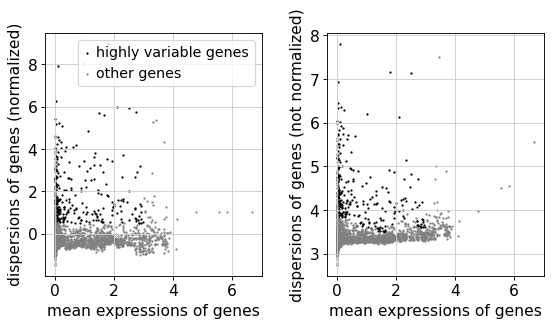

In [65]:
sc.pl.highly_variable_genes(GI_adata)

In [66]:
GI_adata.var.highly_variable.sum()

284

In [67]:
sc.pp.scale(GI_adata, max_value=10)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [70]:
GI_adata.write('GI_processed_KeptPerturb_RAW_LibraryCheck_NormBYHighGenes_processed.h5ad')

In [71]:
GI_adata.X.min(), GI_adata.X.max()

(-12.470766, 10.0)